# <center><b> Project on "50_startups_analysis" </b></center>

#### <p style='text-align: right;'> Deepak Kumar </p>

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.svm import SVR

## 2. Reading the dataset

In [2]:
# Reading data from csv file

df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
# Dataset description

df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## 3. Data Wrangling

In [4]:
# Checking dataset for null values

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [5]:
# Checking dataset for zero values in columns

cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
count = (df[cols] == 0).sum()
count

R&D Spend          2
Administration     0
Marketing Spend    3
Profit             0
dtype: int64

In [6]:
# Replacing zeroes with median values

df['R&D Spend'].replace(to_replace = 0, value = df['R&D Spend'].median(), inplace = True)
df['Marketing Spend'].replace(to_replace = 0, value = df['Marketing Spend'].median(), inplace = True)

## 4. Visualizaing the data

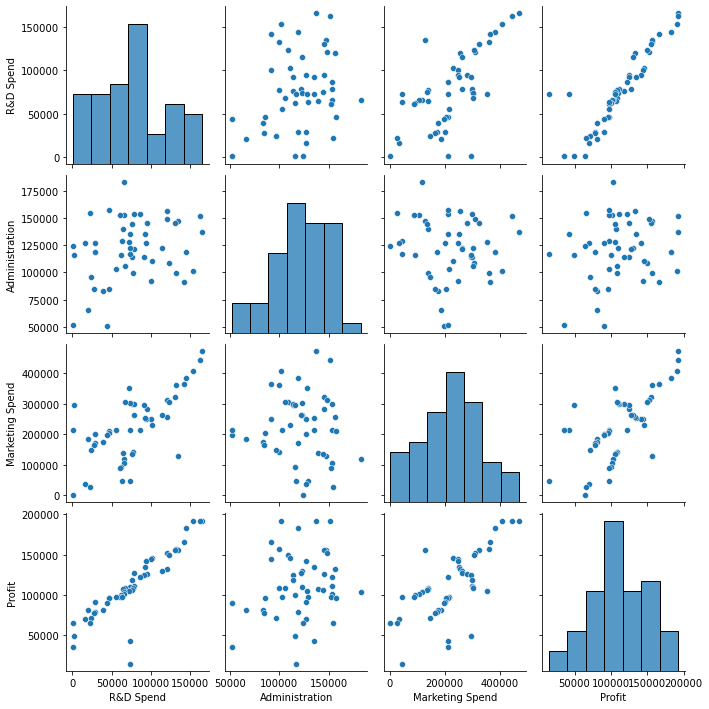

In [7]:
# Drawing pairplot

sns.pairplot(df)

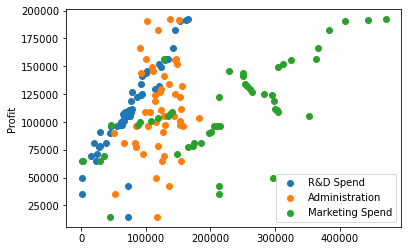

In [8]:
# Drawing scatterplot

plt.scatter(df['R&D Spend'], df['Profit'])
plt.scatter(df['Administration'], df['Profit'])
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.ylabel('Profit')
plt.legend(['R&D Spend', 'Administration', 'Marketing Spend'])
plt.show()

<AxesSubplot:>

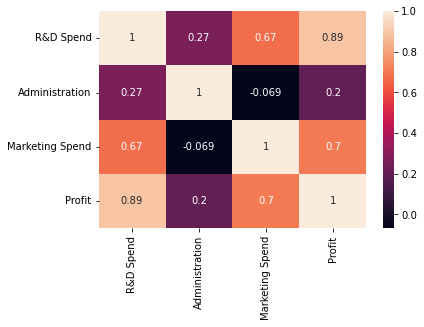

In [9]:
# Gives positive & negative relation between categories

sns.heatmap(df.corr(), annot=True)

In [10]:
# Extracting dependent and independent variables

x = df.drop(['Profit'], axis = 1)
y = df[['Profit']]

In [11]:
# Splitting the data into train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 7)

## 5. Implementing the model

### 1. Multiple Linear Regression

In [12]:
# Fitting the MLR model to the training set

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [13]:
#Predicting the Test set result

y_pred = lr_model.predict(x_test)
y_pred

array([[125420.54698204],
       [139391.32567804],
       [119196.09502132],
       [ 68402.32925716],
       [ 86954.46884373],
       [124125.30511731],
       [192013.46313469],
       [119393.78155479],
       [126993.1955848 ],
       [ 79873.12236198],
       [ 83669.25757038],
       [ 73192.97651096],
       [ 94194.93415254],
       [128533.67848061],
       [131200.38321965],
       [ 87952.19894333],
       [ 93784.70879549],
       [ 72058.81329555]])

Text(0, 0.5, 'Predicted profit')

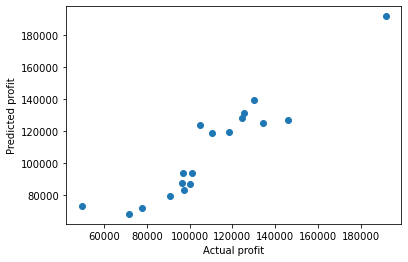

In [14]:
# Plotting the data

plt.scatter(y_test, y_pred)
plt.xlabel('Actual profit')
plt.ylabel('Predicted profit')

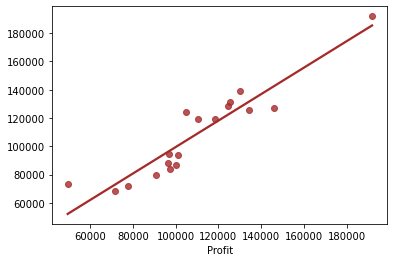

In [15]:
sns.regplot(x = y_test, y = y_pred, ci = None, color = 'brown');

In [16]:
# Training data score

lr_model.score(x_train, y_train)

0.7837251511467899

In [17]:
# Linear Regression metrics

print("MSE = ",mean_squared_error(y_test,y_pred))
print("MSLE = ",np.log(mean_squared_error(y_test,y_pred)))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)*100
print('Accuracy of the model = %.2f' %r2)

MSE =  124565525.79328506
MSLE =  18.64034244700832
RMSE =  11160.892696970304
Accuracy of the model = 86.62


### 2. Neural Network Regression 

In [18]:
# Defining function to scale the data (This performs z-score normalization)

def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train), columns = x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns = x_test.columns)
    return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [19]:
# Model creation using the Sequential in tensorflow

def get_sequential():
    model = Sequential([
    Dense(160, kernel_initializer = 'normal', activation = 'relu'),
    Dropout(0.2),
    Dense(480, kernel_initializer = 'normal', activation = 'relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer = 'normal', activation = 'relu'),
    Dense(1, kernel_initializer = 'normal', activation = 'linear')
  ])
    return model

In [20]:
# build the model
model = get_sequential()

In [21]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(loss = msle, optimizer = Adam(learning_rate = 0.01), metrics = [msle])

# train the model
history = model.fit(x_train_scaled.values, y_train.values, epochs = 20, batch_size = 64, validation_split = 0.2)

Epoch 1/20
1/1 [==============================] - 1s 871ms/step - loss: 132.8433 - mean_squared_logarithmic_error: 132.8433 - val_loss: 117.7662 - val_mean_squared_logarithmic_error: 117.7662
Epoch 2/20
1/1 [==============================] - 0s 54ms/step - loss: 114.8732 - mean_squared_logarithmic_error: 114.8732 - val_loss: 97.2157 - val_mean_squared_logarithmic_error: 97.2157
Epoch 3/20
1/1 [==============================] - 0s 42ms/step - loss: 93.8027 - mean_squared_logarithmic_error: 93.8027 - val_loss: 78.5244 - val_mean_squared_logarithmic_error: 78.5244
Epoch 4/20
1/1 [==============================] - 0s 35ms/step - loss: 75.7474 - mean_squared_logarithmic_error: 75.7474 - val_loss: 64.0328 - val_mean_squared_logarithmic_error: 64.0328
Epoch 5/20
1/1 [==============================] - 0s 42ms/step - loss: 61.3090 - mean_squared_logarithmic_error: 61.3090 - val_loss: 53.0168 - val_mean_squared_logarithmic_error: 53.0168
Epoch 6/20
1/1 [==============================] - 0s 39ms/

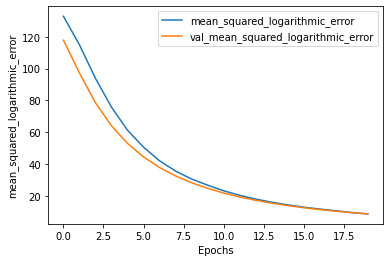

In [22]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
    
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [23]:
model.predict(x_test_scaled)

array([[ 4643.567 ],
       [ 4906.2427],
       [ 4262.1997],
       [ 6139.385 ],
       [ 5290.6143],
       [ 4835.6187],
       [11282.113 ],
       [ 4143.971 ],
       [ 4055.0042],
       [ 4804.3657],
       [ 6112.6055],
       [ 4876.6055],
       [ 5499.535 ],
       [ 4359.532 ],
       [ 5507.134 ],
       [ 5147.7397],
       [ 5837.761 ],
       [ 6109.9277]], dtype=float32)

In [24]:
accuracy = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 81ms/step - loss: 78.0013 - mean_squared_logarithmic_error: 78.0013


### 3. Decision Tree Regression

In [25]:
# Creating and fitting the model

model = DecisionTreeRegressor(random_state = 0) 
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
# Predicting the values of profit

y_pred = model.predict(x_test)

In [27]:
# Comparing real values with predicted values

df_comp = pd.DataFrame({'Actual profit':y_test.values.tolist(), 'Predicted profit':y_pred})
df_comp

,Actual profit,Predicted profit
0,[134307.35],141585.52
1,[129917.04],141585.52
2,[110352.25],42559.73
3,[71498.49],97483.56
4,[99937.59],97483.56
5,[105008.31],42559.73
6,[191792.06],192261.83
7,[118474.03],42559.73
8,[146121.95],144259.40
9,[90708.19],81229.06


In [28]:
# Calculation of Mean Squared Error (MSE)

print('MSE = ', mean_squared_error(y_test, y_pred))
print("MSLE = ",np.log(mean_squared_error(y_test,y_pred)))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  1283567235.2402387
MSLE =  20.972908941196597
RMSE =  35826.90658206816


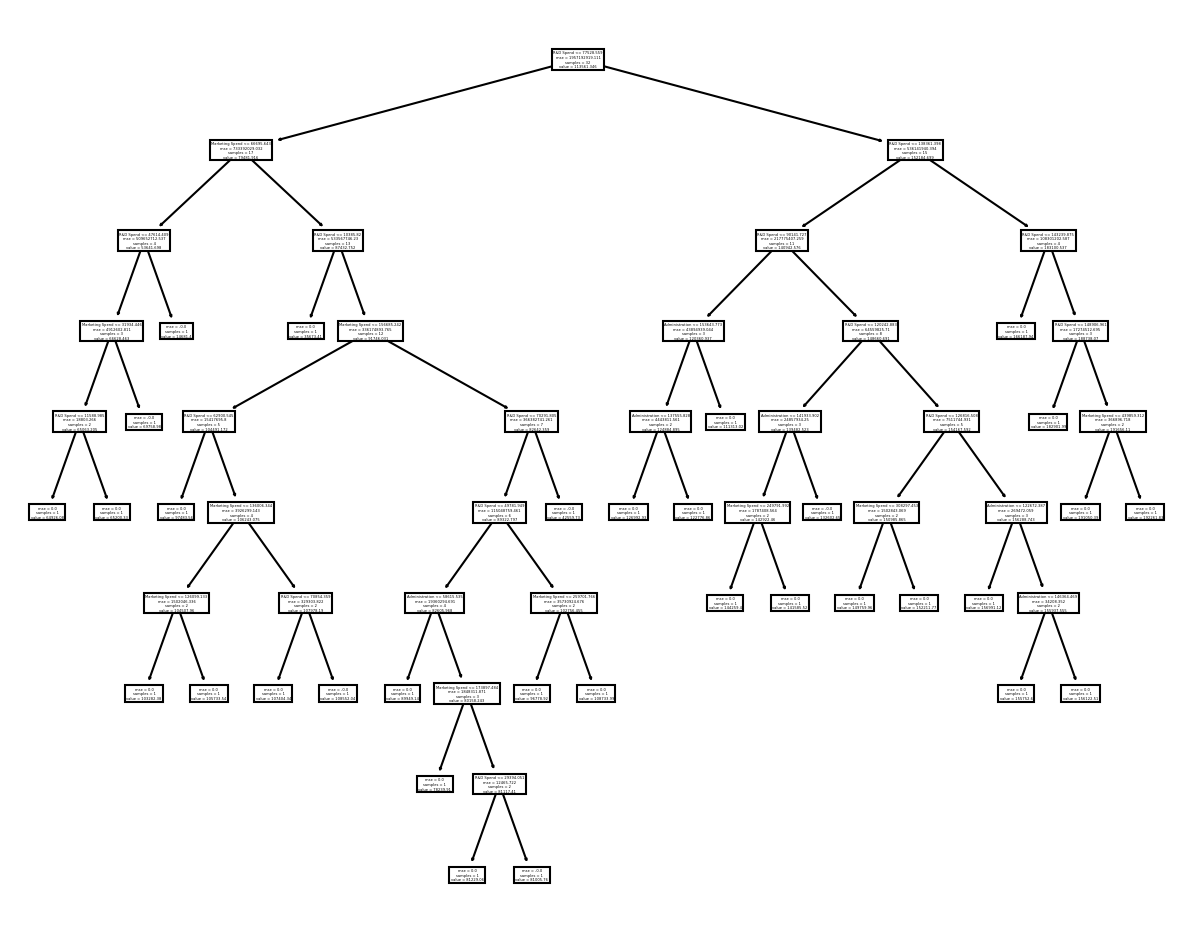

In [29]:
# Plotting decision tree

plt.figure(figsize = (10,8), dpi = 150)
plot_tree(model, feature_names = x.columns);

### 4. Support vector regressor (with linear kernel)


In [30]:
# Fitting the model

svr_linear = SVR(kernel = 'linear', gamma = 'scale', C = 1.0, epsilon = 0.1)
svr_linear.fit(x_train, y_train.values.ravel())

SVR(kernel='linear')

In [31]:
# Test score

svr_linear.score(x_test, y_test)

0.9327164295705452

In [32]:
# Predicting the values oof profit

y_pred = svr_linear.predict(x_test)
pd.DataFrame({'Predicted profit': y_pred})

,Predicted profit
0,124181.070002
1,143862.191355
2,110188.320337
3,71561.190623
4,101815.226282
5,107974.714686
6,180302.872736
7,112842.710749
8,134622.935709
9,72820.430948


In [33]:
# Printing errors

print("MSE for linear SVR:", mean_squared_error(y_test, y_pred))
print("MSLE for linear SVR: ",np.log(mean_squared_error(y_test,y_pred)))
print("RMSE for linear SVR:", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE for linear SVR: 62653891.98752778
MSLE for linear SVR:  17.953136360082766
RMSE for linear SVR: 7915.421150357559


## 5. Random Forest Regressor

In [34]:
# import the regressor

from sklearn.ensemble import RandomForestRegressor

In [35]:
# Training the algorithm

regressor = RandomForestRegressor(n_estimators = 50, random_state = 7)
regressor.fit(x_train_scaled, y_train.values.ravel())
y_pred = regressor.predict(x_test_scaled)

In [36]:
# Predicting the values

pd.DataFrame({'Predicted profit': y_pred})

,Predicted profit
0,134125.7612
1,140793.7164
2,69357.3828
3,80359.1124
4,98685.1584
5,69226.4508
6,186702.9094
7,101704.3354
8,140487.8420
9,71575.1894


In [37]:
# Evaluating the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSLE: ",np.log(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 13454.909811111109
Mean Squared Error: 300871001.1701755
Root Mean Squared Error: 17345.63349002208
MSLE:  19.52219216331089


## From all the five algorithms we can say that Multile Linear Regression is the best algorithm for prediction with mean square logarithmic error = 18.64